# 28.MACHINE LEARNING - X-Additional Excercise-2

In [1]:

import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("bank-additional-full.csv",sep=';')
df=df.drop(['duration'],axis=1)
print(df.shape)
df.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


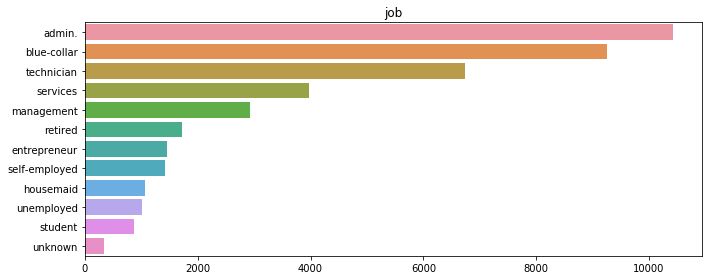

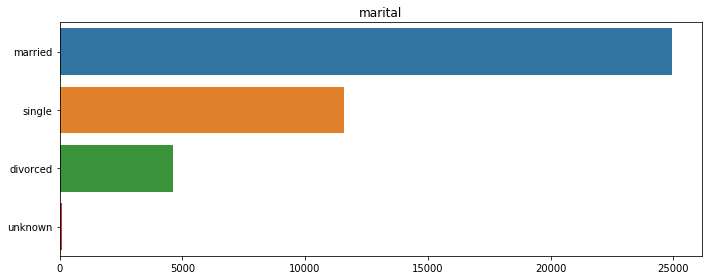

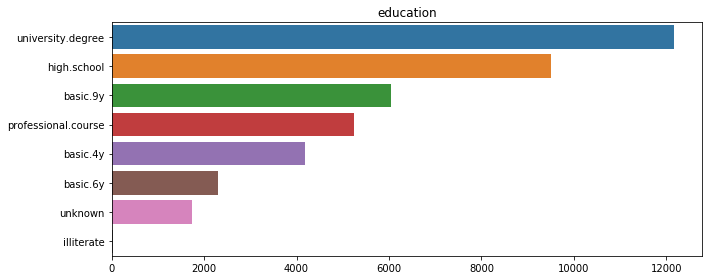

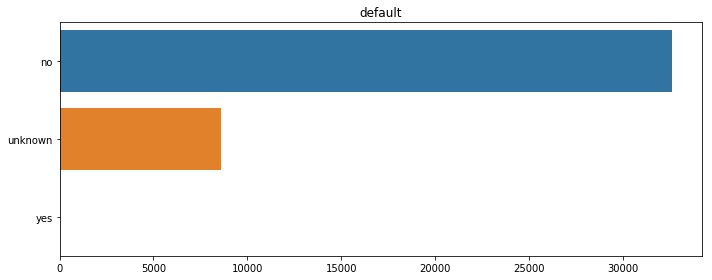

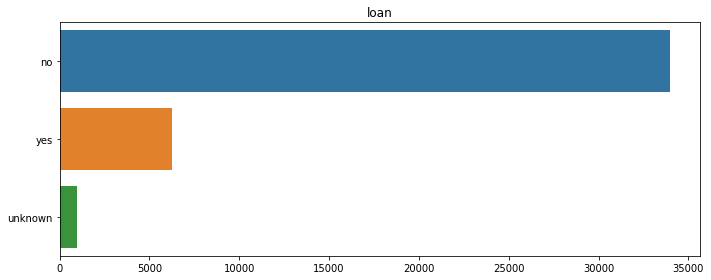

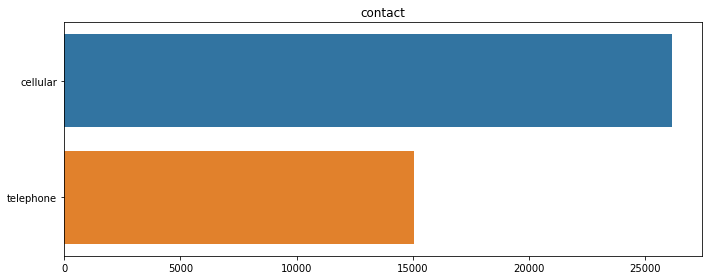

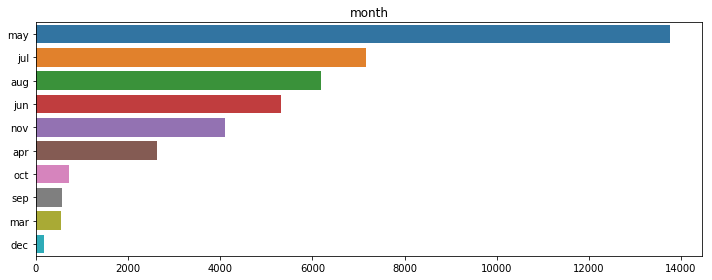

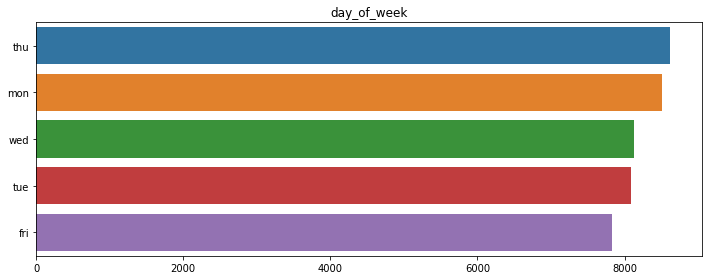

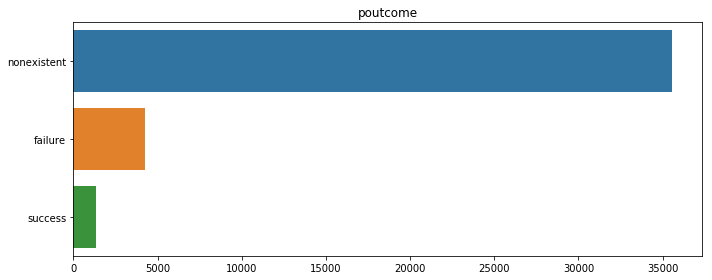

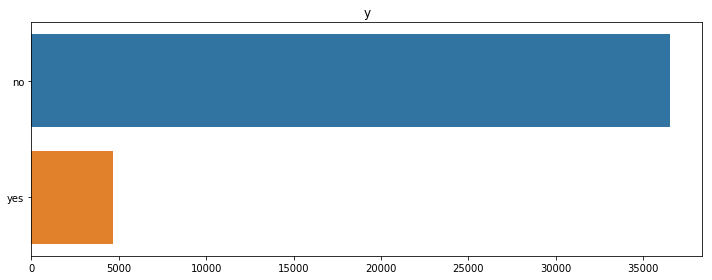

In [3]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

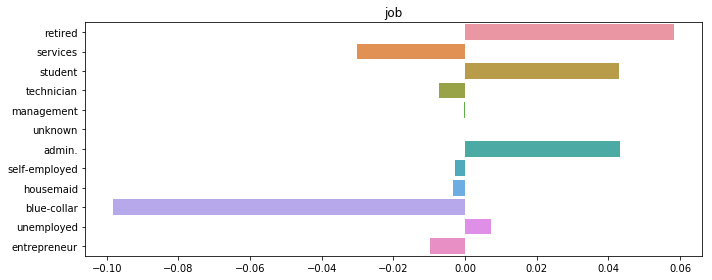

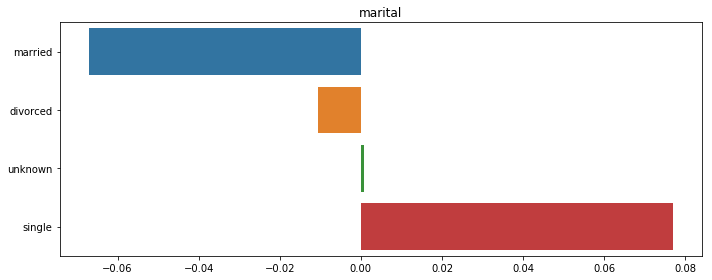

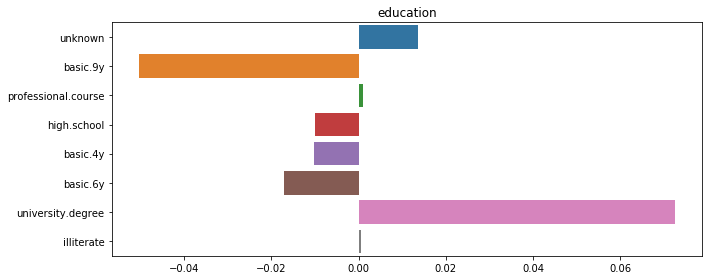

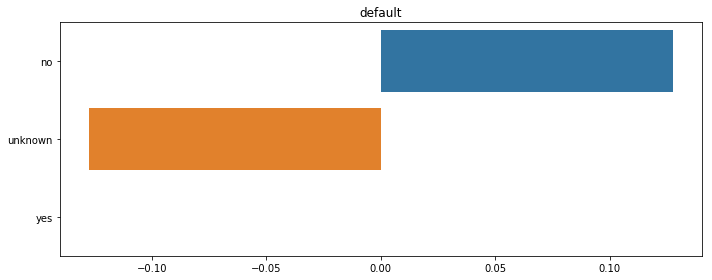

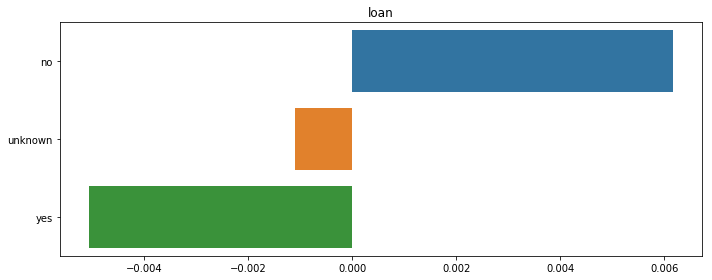

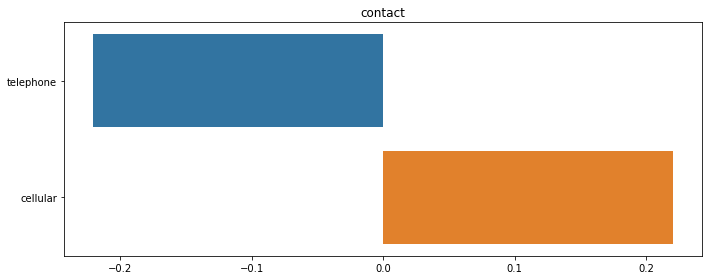

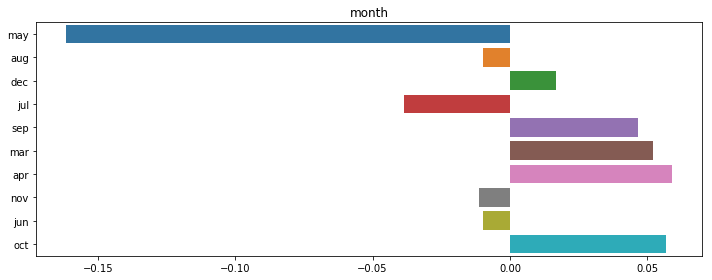

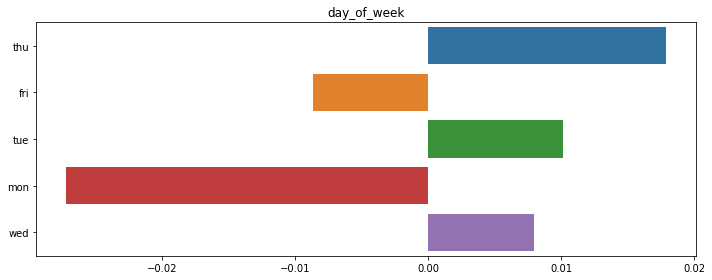

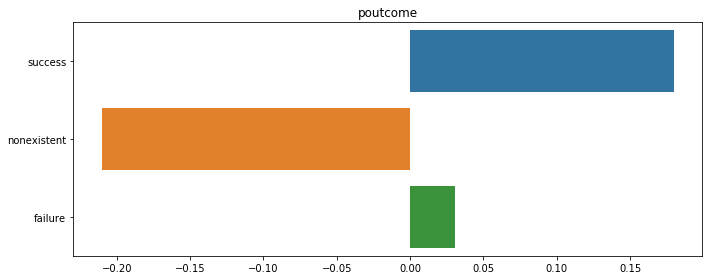

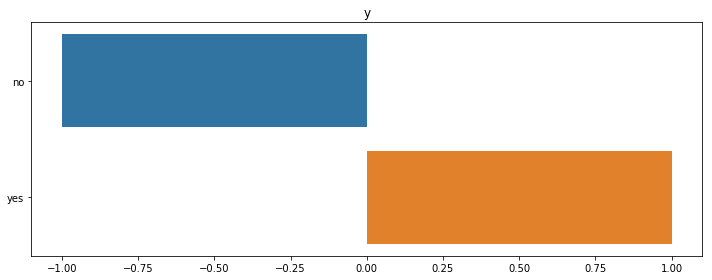

In [4]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = df.loc[df.y.values == 'yes', col].value_counts() 
    neg_counts = df.loc[df.y.values == 'no', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (df.y.values == 'yes').sum()
    freq_neg = (df.y.values == 'no').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [5]:
## Creating new variables (variable name + '_un') to capture the information if the missing values are at random or is there
## a pattern in the missing values.
significant_cat_variables = ['education','job','housing','loan']
for var in significant_cat_variables:
    #df[var + '_un'] = 0
    #df[var + '_un'][df[var]=='unknown'] = 1
    #FIXME one-line coding
    df[var + '_un'] = (df[var] == 'unknown').astype(int)

In [6]:
def cross_tab(df,f1,f2):
    jobs=list(df[f1].unique())
    edu=list(df[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=df[df[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [7]:
cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77,3329,151,499,363,249,5753,1.0
blue-collar,2318,878,1426,3623,453,454,94,8.0
entrepreneur,137,234,71,210,135,57,610,2.0
housemaid,474,174,77,94,59,42,139,1.0
management,100,298,85,166,89,123,2063,0.0
retired,597,276,75,145,241,98,285,3.0
self-employed,93,118,25,220,168,29,765,3.0
services,132,2682,226,388,218,150,173,0.0
student,26,357,13,99,43,167,170,0.0
technician,58,873,87,384,3320,212,1809,0.0


In [8]:
df['job'][df['age']>60].value_counts()

retired          678
housemaid         54
admin.            47
technician        34
management        30
unknown           21
blue-collar       20
self-employed      9
entrepreneur       8
unemployed         7
services           2
Name: job, dtype: int64

In [9]:

df.loc[(df['age']>60) & (df['job']=='unknown'), 'job'] = 'retired'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education'] = 'university.degree'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education'] = 'high.school'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education'] = 'basic.4y'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.4y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.6y'), 'job'] = 'blue-collar'
df.loc[(df['job'] == 'unknown') & (df['education']=='basic.9y'), 'job'] = 'blue-collar'
df.loc[(df['job']=='unknown') & (df['education']=='professional.course'), 'job'] = 'technician'

In [10]:

cross_tab(df,'job','education')

,basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate
admin.,77.0,3329,151.0,499.0,363.0,249.0,5753,1.0
blue-collar,2366.0,878,1448.0,3654.0,453.0,454.0,94,8.0
entrepreneur,137.0,234,71.0,210.0,135.0,57.0,610,2.0
housemaid,516.0,174,77.0,94.0,59.0,0.0,139,1.0
management,100.0,298,85.0,166.0,89.0,0.0,2186,0.0
retired,601.0,276,75.0,145.0,243.0,112.0,286,3.0
self-employed,93.0,118,25.0,220.0,168.0,29.0,765,3.0
services,132.0,2832,226.0,388.0,218.0,0.0,173,0.0
student,26.0,357,13.0,99.0,43.0,167.0,170,0.0
technician,58.0,873,87.0,384.0,3330.0,212.0,1809,0.0


In [11]:
jobhousing=cross_tab(df,'job','housing')
jobloan=cross_tab(df,'job','loan')

In [12]:
def fillhousing(df,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['housing']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"housing"]='no'
        df.loc[ind2,"housing"]='yes'
    return df

In [13]:
def fillloan(df,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=df[np.logical_and(np.array(df['loan']=='unknown'),np.array(df['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        df.loc[ind1,"loan"]='no'
        df.loc[ind2,"loan"]='yes'
    return df

In [14]:
df=fillhousing(df,jobhousing)

In [15]:
df=fillloan(df,jobloan)

In [16]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
df[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
def drawhist(df,feature):
    plt.hist(df[feature])

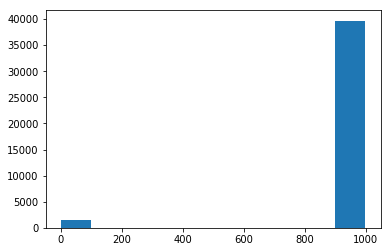

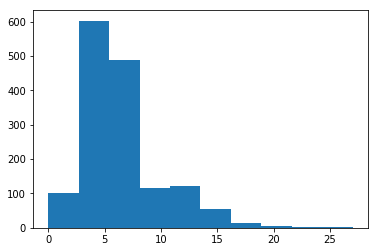

In [18]:
drawhist(df,'pdays')
plt.show()
plt.hist(df.loc[df.pdays != 999, 'pdays'])
plt.show()

In [19]:
pd.crosstab(df['pdays'],df['poutcome'], values=df['age'], aggfunc='count', normalize=True)


poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.000364
1,0.000000,0.000000,0.000631
2,0.000000,0.000000,0.001481
3,0.000097,0.000000,0.010561
4,0.000049,0.000000,0.002816
5,0.000097,0.000000,0.001020
6,0.000607,0.000000,0.009396
7,0.000364,0.000000,0.001093
8,0.000146,0.000000,0.000291


In [20]:
#Add new categorical variables to our dataframe.
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1
df_dropped_pdays = df.drop('pdays', axis=1);

In [21]:
df_with_dummies=pd.get_dummies(df_dropped_pdays)

In [22]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [23]:

features_dropped = ['default_no','housing_no','loan_no','y_no','marital_single','contact_cellular',
                    'education_unknown','job_unknown','housing_unknown','loan_unknown', 'pdays_less_5']
df_clean = dropfeature(df_with_dummies, features_dropped)

In [24]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')
    
def drawhist(df,feature):
    '''Draws an histogram for a feature in a data frame (df)'''
    plt.hist(df[feature])

def functionreplace(df,fea,val1,val2):
    '''Replaces value (val1) with value (val2) in the data frame (df) for a feature (fea)'''
    df[fea].replace(val1,val2)
    return df

def drawbarplot(df,x,y):
    '''Draws a bar plot for a given feature x and y in a data frame'''
    sns.barplot(x=x, y=y, data=df)

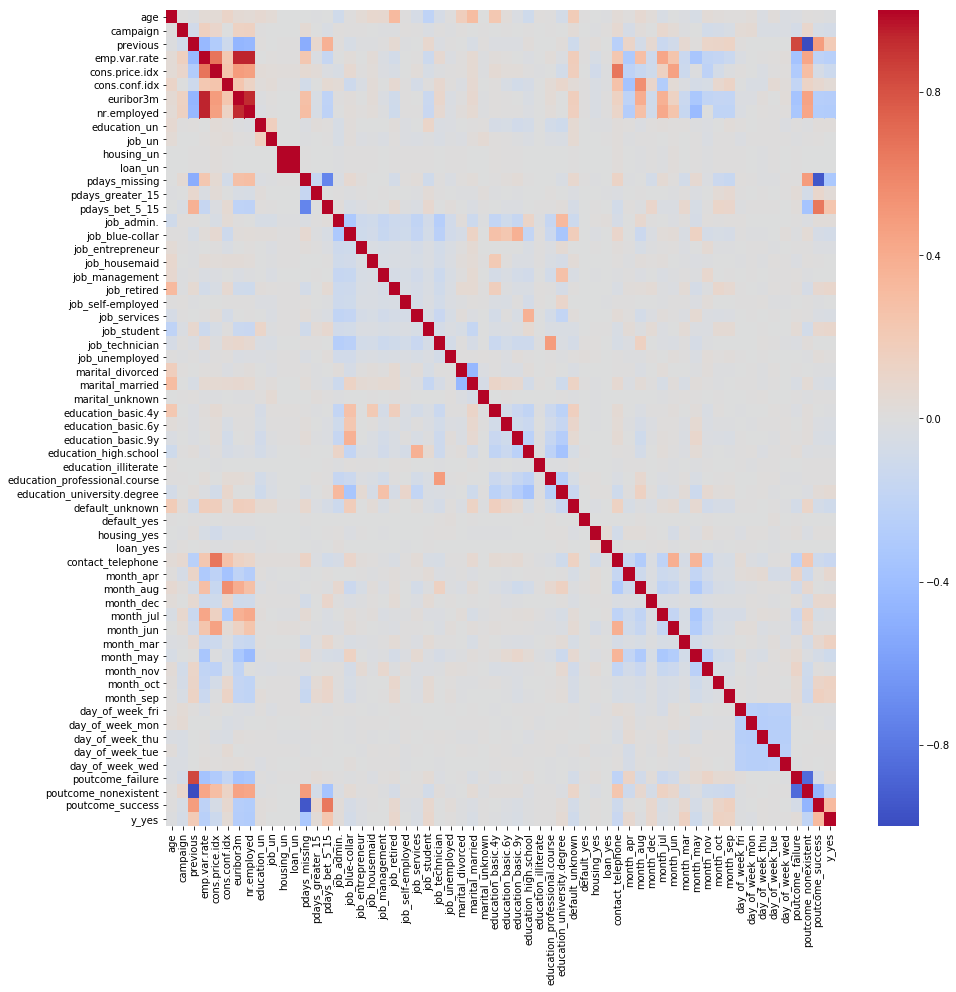

In [25]:

drawheatmap(df_clean)

In [26]:
def getmeanauc(aucs,model):
    ''' Calculates the mean AUC for all the cross-validated samples and computes the value of C (Regularization Parameter) 
    for which max mean auc is obtained'''
    #Initialize empty array to hold mean AUC values.
    meanauc = []
    maxmean = 0 #Initial value for maximum mean AUC
    models_with_1_param = ['Logistic_Regression' , 'Ada_Boost']
    models_with_2_params = ['Decision_Tree' , 'Random_Forest', 'Grad_Boost']
    for c in aucs: #For loop to append AUC value to meanauc array.
        meanauc.append(np.mean(aucs[c]))
        if maxmean < np.mean(aucs[c]):
            maxmean = np.mean(aucs[c]) #Adjust value of maxmean
            cval = c
    if model in models_with_1_param:
        print("C value for max auc is: ",cval)
        print("Max Mean Auc corresponding to the optimal value of C = ", maxmean)
        return meanauc,cval
    if model in models_with_2_params:
        listSL=cval.split('L')
        splitval=int(listSL[0]) #Stores minimum split value for max AUC
        leafval=int(listSL[1]) #Stores minimum leaf value for max AUC
        print("min_sample_split value for max auc is:",splitval)
        print("min_sample_leaf value for max auc is:",leafval)
        print("Max mean AUC corresponding to optimal leaf and split value = ",maxmean)
        return meanauc,splitval,leafval

def plot_mean_auc_LR(aucs,cs, label):
    '''Plots different values of mean auc versus the hyperparameter C'''
    plt.plot(np.log10(cs),aucs, label = label )
    plt.xlabel("C (Regularization Parameter)")
    plt.ylabel("Mean AUC")
    plt.legend()
        
def plotfeatureimportances(train, importance):
    '''Plots feature importance in a sorted order and shows the most significant variables at the top'''
    X = list(train.columns)
    X.remove('y_yes')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 15)
    sns.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')
    
def plotfeatureimp(fl,col):
    '''Plots the feature importance of all the independent variables in the model'''
    f=plt.figure(figsize=(10,15))
    plt.barh(range(len(fl)),fl)
    plt.yticks(range(len(col[:-1])),col[:-1])
    
def plotAUCDTRF(aucs,leafs,splits):
    '''Plots AUC for each value of Leaf and Split combination'''
    for i in range(len(splits)):
        plt.plot(leafs,aucs[len(leafs)*i:len(leafs)*i+len(leafs)], label = 'Split value= ' + str(splits[i]))
    plt.legend()
    plt.xlabel('Leaf Values')
    plt.ylabel('Mean AUC')
    
def plot_mean_auc_Ada_Boost(aucs, estimators, label):
    '''Plots different values of mean auc versus the Estimators for AdaBoosting'''
    plt.plot(estimators,aucs, label = label )
    plt.xlabel("Estimators")
    plt.ylabel("Mean AUC")
    plt.legend()

In [27]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_clean, train_size=0.8, random_state=5)
print('Original:', (df_clean.y_yes).mean(), 'Train:', (train.y_yes).mean(), 'Test:', (test.y_yes).mean())

train, test = train_test_split(df_clean, train_size=0.8, stratify=df_clean.y_yes.values, random_state=5)
print('Original:', (df_clean.y_yes).mean(), 'Train:', (train.y_yes).mean(), 'Test:', (test.y_yes).mean())


Original: 0.11265417111780131 Train: 0.11068285280728377 Test: 0.12053896576839039
Original: 0.11265417111780131 Train: 0.11265553869499241 Test: 0.11264870114105366


In [28]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
def LRmodel(train , validate , c, l_1 = False):
    '''Fits the Logistic Regression Model on the training data set and calculates evaluation metrics on the validation set
    with the regularization constant C'''
    X=list(train.columns) #Create list of column labels from training data
    Y='y_yes'
    X.remove('y_yes')
    scaler = StandardScaler().fit(train[X]) #Standardize features by removing the mean and scaling to unit variance
    train_std = scaler.transform(train[X]) #Compute the mean and standard deviation on training set
    validate_std = scaler.transform(validate[X])
    xtrain = train_std
    ytrain = train[Y]
    xval = validate_std
    yval = validate[Y]
    if l_1:
        logreg = LogisticRegression(C = c, penalty= 'l1') #Apply logistic regression on L1 penalty
    else:
        logreg = LogisticRegression(C=c)
    logreg.fit(xtrain,ytrain)
    pred_proba_val = logreg.predict_proba(xval)[:,1]
    auc = metrics.roc_auc_score(yval, pred_proba_val)
    fpr, tpr, threshold = metrics.roc_curve(yval, pred_proba_val)
    accuracy = metrics.accuracy_score(yval, logreg.predict(xval))
    return auc,logreg.coef_, tpr, fpr, threshold, accuracy

In [29]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import preprocessing

def kfoldlr(dataset , k , cs, l1_penalty = False):
    '''Performs kfold cross validation for the dataset and also searches for the optimal regularixation parameter '''
    aucs = {}
    kf = KFold(len(dataset),k) #Provides indices to split data in train/test sets
    for train_idx, vali_idx in kf: #For loop to extract and append AUC values to array from training data
        cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
        for c in cs:
            auc, f_imp, tpr, fpr, threshold, accuracy = LRmodel(cv_train,cv_validate,c, l_1 = l1_penalty)
            if c in aucs:
                aucs[c].append(auc)
            else:
                aucs[c]=[]
                aucs[c].append(auc)
    return aucs

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
cs = np.logspace(-4,5,10)
aucs_l2=kfoldlr(train , 5 , cs)
aucs_l1=kfoldlr(train , 5 , cs, l1_penalty= True)

In [31]:
means_l2,cval_l2 = getmeanauc(aucs_l2,'Logistic_Regression')
means_l1,cval_l1 = getmeanauc(aucs_l1,'Logistic_Regression')

C value for max auc is:  0.1
Max Mean Auc corresponding to the optimal value of C =  0.7900818557731812
C value for max auc is:  0.1
Max Mean Auc corresponding to the optimal value of C =  0.7903117233700842


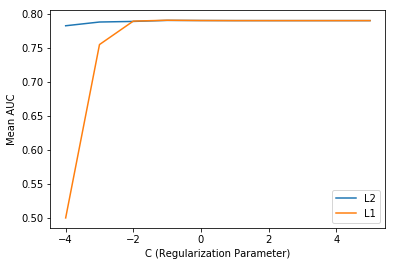

In [32]:

plot_mean_auc_LR(means_l2,cs, label = 'L2')
plot_mean_auc_LR(means_l1,cs, label = 'L1')

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
def DTmodel(train,validation,leaf=1,split=2):
    '''Decision Tree model to fit the train set to decision tree and predict AUC on test/validation set'''
    X=list(train.columns) #Create list of column labels from training data
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X] 
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]
    
    #Runs sklearn's decision tree algorithm on the training data with min leaf size 1 and split size 2
    dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=leaf,min_samples_split=split) 
    
    #Train the model
    dt.fit(xtrain,ytrain)
    predict_proba_val=dt.predict_proba(xval)[:,1] #Predict class probabilities of input validation data
    auc=metrics.roc_auc_score(yval,predict_proba_val) #Compute ROC AUC from prediction scores
    fpr,tpr,threshold=metrics.roc_curve(yval,predict_proba_val) #Compute ROC
    accuracy=metrics.accuracy_score(yval,dt.predict(xval)) #Compute subset accuracy classification score
    
    #Feature importances. The higher the score, the more important the feature. 
    #Computed as the normalized total reduction of the criterion brought by that feature.
    imp=dt.feature_importances_ 
    return auc,imp,tpr,fpr,threshold,accuracy

In [34]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import preprocessing

def kfoldDTRF(dataset, k,split,leaf,model):
    '''K-fold validation function for Decision tree and Random Forest. K=5, hence input data set is divided 
    into 5 datasets out of which 4 of them will be used to fit model and one to validate the model in each iteration '''
    aucs={}
    kf=KFold(len(dataset),k) #Provides indices to split data in train/test sets
    for train_idx, vali_idx in kf: 
        cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
        for sp in split:
            for lf in leaf:
                if model=='DT':
                    #Run decision tree function above based on user input
                    core,fimp,tpr,fpr,threshold,accuracy=DTmodel(cv_train,cv_validate,lf,sp)
                if model=='RF':
                    #Run random forest function below based on user input
                    core,fimp,tpr,fpr,threshold,accuracy=randomforrest(cv_train,cv_validate,lf,sp)
                
                if str(sp)+"L"+str(lf) in aucs:
                    aucs[str(sp)+"L"+str(lf)].append(core)
                else:
                    aucs[str(sp)+"L"+str(lf)]=[]
                    aucs[str(sp)+"L"+str(lf)].append(core)
    return aucs

In [35]:
split = np.geomspace(10,2000,num=10,dtype=int)
leaf = np.geomspace(5,200,num=10,dtype=int)
aucsdt=kfoldDTRF(train,5,split,leaf,'DT')

min_sample_split value for max auc is: 1110
min_sample_leaf value for max auc is: 132
Max mean AUC corresponding to optimal leaf and split value =  0.792356879500353


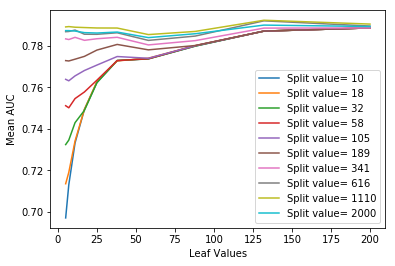

In [36]:
meanauc,splitval,leafval=getmeanauc(aucsdt,'Decision_Tree')
plotAUCDTRF(meanauc,leaf,split)

In [37]:
from sklearn.ensemble import RandomForestClassifier

def randomforrest(train,validation,leaf=1,split=2):
    '''Random Forest model to fit the training set to random forest and compute AUC on test/validation set'''
    X=list(train.columns) #Provides indices to split data in train/test sets
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X]
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]
    
    #Run sklearn's random forest algorithm with 128 trees and a minimum split size of 2 and minimum leaf size 1
    random_forest = RandomForestClassifier(n_estimators=128,min_samples_split=split,min_samples_leaf=leaf)
    
    #Train the model
    random_forest.fit(xtrain,ytrain)
    
    #Predict target values
    Y_pred = random_forest.predict(xval)
    
    #Predict class probabilities of input validation data
    proba_val=random_forest.predict_proba(xval)[:,1]
    
    #Compute ROC
    fpr, tpr, thresholds=metrics.roc_curve(yval,proba_val)
    
    #Compute ROC AUC scores from prediction values
    score=metrics.roc_auc_score(yval,proba_val)
    
    #Feature importances. The higher the score, the more important the feature. 
    #Computed as the normalized total reduction of the criterion brought by that feature.
    importance=random_forest.feature_importances_
    accuracy=metrics.accuracy_score(yval,random_forest.predict(xval))
    return score,importance,tpr,fpr,thresholds,accuracy

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:

RF_split = np.geomspace(10,2000,num=10,dtype=int)
RF_leaf = np.geomspace(5,200,num=10,dtype=int)

RF_auc=kfoldDTRF(train,5,RF_split,RF_leaf,'RF')

min_sample_split value for max auc is: 341
min_sample_leaf value for max auc is: 7
Max mean AUC corresponding to optimal leaf and split value =  0.7982437336009945


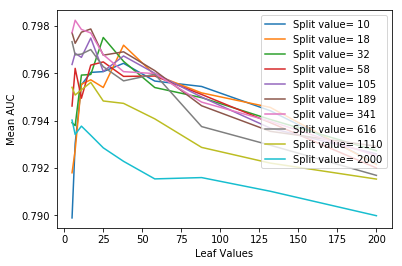

In [39]:
RF_aucs,RF_splitval,RF_leafval=getmeanauc(RF_auc,'Random_Forest')
plotAUCDTRF(RF_aucs,RF_leaf,RF_split)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
def GBoosting(train,validation,leaf=1,split=2):
    """Function for gradient boosting to minimize loss via weak learners"""
    X=list(train.columns)
    Y='y_yes'
    X.remove('y_yes')
    xtrain=train[X]
    ytrain=train[Y]
    xval=validation[X]
    yval=validation[Y]
    
    GB = GradientBoostingClassifier(min_samples_split=split,min_samples_leaf=leaf)
    
    #Train the model
    GB.fit(xtrain,ytrain)
    
    #Predict target values
    Y_pred = GB.predict(xval)
    
    #Predict class probabilities of input validation data
    gbplot=GB.predict_proba(xval)
    gbpre=gbplot[:,1]
    
    #Compute ROC
    gbfpr, gbtpr, gbthresholds=metrics.roc_curve(yval,gbpre)
    
    #Compute ROC AUC scores from prediction values
    gbscore=metrics.roc_auc_score(yval,gbpre)
    gbaccuracy=metrics.accuracy_score(yval,GB.predict(xval))
    
    #Feature importances. The higher the score, the more important the feature. 
    importance=GB.feature_importances_
    
    return gbscore,importance,gbtpr,gbfpr,gbthresholds,gbaccuracy


In [41]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import preprocessing
def kfoldGB(dataset, k,split,leaf):
    aucs={}
    kf=KFold(len(dataset),k) #Provides indices to split data in train/test sets
    for sp in split:
        for lf in leaf:
            for train_idx, vali_idx in kf:
                cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
                #Run Gradient Boosted Trees function defined above based on user input
                gbscore,importance,gbtpr,gbfpr,gbthresholds,gbaccuracy= GBoosting(cv_train,cv_validate,lf,sp)
                
                #Storing the AUC scores in the aucs dictionary for all split values (sp) and leaf values (lf)
                if str(sp)+"L"+str(lf) in aucs:
                    aucs[str(sp)+"L"+str(lf)].append(gbscore)
                else:
                    aucs[str(sp)+"L"+str(lf)]=[]
                    aucs[str(sp)+"L"+str(lf)].append(gbscore)
    return aucs

In [42]:
gbsplit = np.geomspace(10,1500, num=8, dtype=int)
gbleaf = np.geomspace(5,750, num=6, dtype=int)
gbaucs=kfoldGB(train,5,gbsplit,gbleaf)

min_sample_split value for max auc is: 175
min_sample_leaf value for max auc is: 37
Max mean AUC corresponding to optimal leaf and split value =  0.8005523814316303


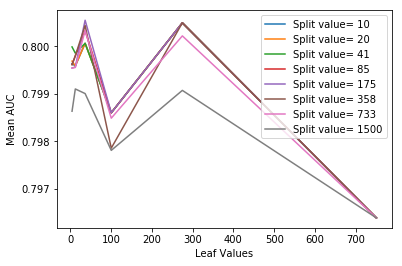

In [43]:
gbauc,gbsplitval,gbleafval=getmeanauc(gbaucs,'Grad_Boost')
plotAUCDTRF(gbauc,gbleaf,gbsplit)

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
def adaboost(settrain,settest, nestimator = 100):
    X=list(settrain.columns)
    Y='y_yes'
    X.remove('y_yes')
    xtrain=settrain[X]
    ytrain=settrain[Y]
    xtest=settest[X]
    ytest=settest[Y]
    #Instantiate a Decision Stump
    dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
    
    #Instantitate an AdaBoostClassifier using the decision stump defined above
    ad = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=nestimator)
    
    #fit the AdaBoostClassifier on the training data
    ad.fit(xtrain,ytrain)
    
    #Predict the Y values for the test/validation data
    Y_pred = ad.predict(xtest)
    
    #Predict class probabilities of input validation data
    adplot=ad.predict_proba(xtest)
    
    
    adpre=adplot[:,1]
    
    #Computation to compute AUC score
    adfpr, adtpr, adthresholds=metrics.roc_curve(ytest,adpre)
    adscore=metrics.roc_auc_score(ytest,adpre)
    
    #Feature importances. The higher the score, the more important the feature.
    ii=ad.feature_importances_
    return adscore,ii

In [46]:
from sklearn.cross_validation import KFold
from sklearn import metrics
from sklearn import preprocessing
def kfoldadaboost(dataset, k, estimators):
    aucs ={}
    kf=KFold(len(dataset),k) #Provides indices to split data in train/test sets
    for e in estimators:
        for train_idx, vali_idx in kf:
            cv_train,cv_validate=dataset.iloc[train_idx,:], dataset.iloc[vali_idx,:]
            
            #Run AdaBoostClassifier function defined above based on user input
            core,f= adaboost(cv_train,cv_validate, nestimator = e) 
            
            #storing the auc Scores in the aucs dictionary for all the estimator values.
            aucs[e] = []
            aucs[e].append(core)
    return aucs

In [47]:
estimators = np.array([50,100,400,600,1000,2000])
adaauc = kfoldadaboost(train, 5, estimators)

C value for max auc is:  1000
Max Mean Auc corresponding to the optimal value of C =  0.8160361038103582


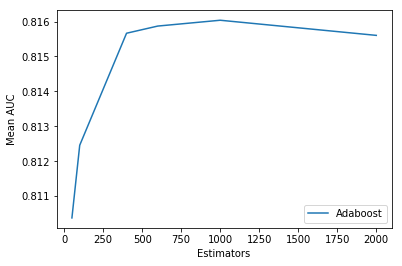

In [48]:

adaaucs,adac=getmeanauc(adaauc,'Ada_Boost')
plot_mean_auc_Ada_Boost(adaaucs,estimators,'Adaboost')

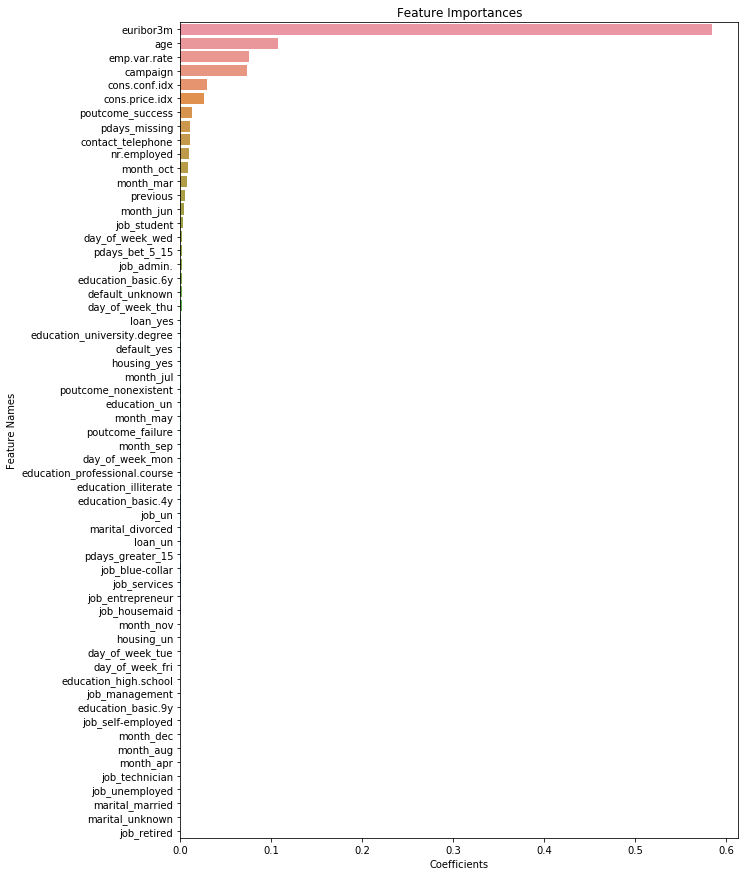

In [49]:

adaauc_test,adafea=adaboost(train,test,adac)
plotfeatureimportances(train,adafea)